In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# path = '2019-11-22_19-07-57_その1.txt'
path = '2019-11-22_19-15-11_その2.txt'

In [3]:
# A1が筋電位、A2が心電図、A3が皮膚電気活動
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(485250, 11)


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,510.0,497.0,102.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,506.0,500.0,102.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,505.0,501.0,102.0,0.0,0.0,0.0


In [24]:
hoge=df['A2'][1000:3000]

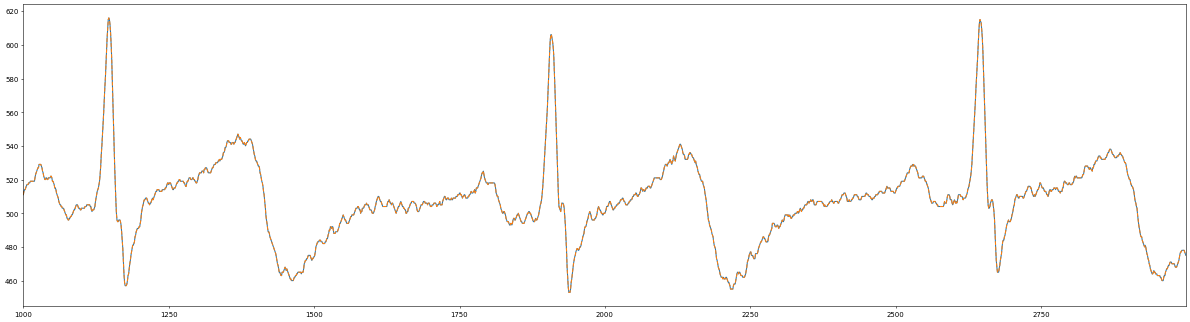

In [38]:
plt.figure(figsize=(30, 8), dpi=50)
hoge.plot()
hoge.rolling(window=1).mean().plot(style='--')

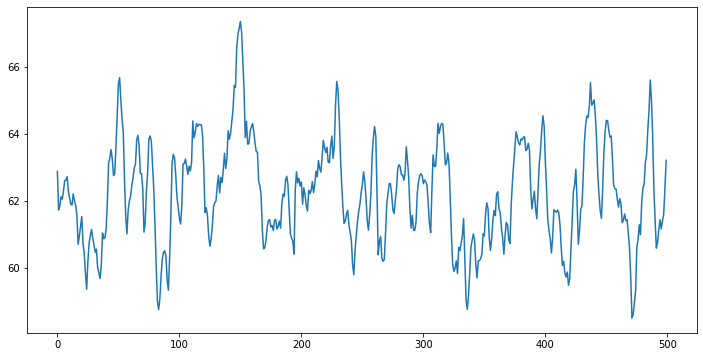

In [5]:
phi_1 = 1.4
phi_2 = -0.48
c = 5
sigma = 0.5
T = 500
# 過程の期待値
mu = c/(1-phi_1-phi_2)


# データの生成
ar_data = np.zeros(T)
ar_data[0] = mu + np.random.normal(0, sigma)
ar_data[1] = mu + np.random.normal(0, sigma)
for t in range(2, T):
    ar_data[t] = c + phi_1*ar_data[t-1] + phi_2*ar_data[t-2] \
                                + np.random.normal(0, sigma)
# データの可視化 (記事中では出力は略します)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ar_data)
plt.show()

In [6]:
# モデルの生成
model = sm.tsa.AR(ar_data)
# AICでモデルの次数を選択
print(model.select_order(maxlag=6, ic='aic'))  # 出力:2

# 推定
result = model.fit(maxlag=2)

# モデルが推定したパラメーター
print(result.params)
# 出力
# [ 5.68403723  1.38825575 -0.47929503]
print(result.sigma2)
# 出力
# 0.23797695866882768

5
[ 6.18715665  1.39502805 -0.49441693]
0.22141089579637713


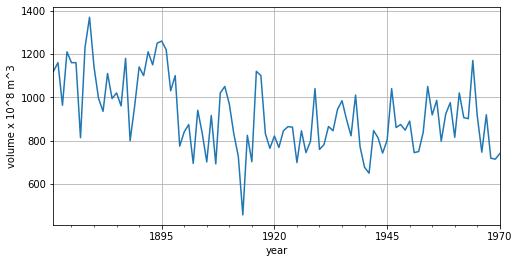

NameError: name 'df_train' is not defined

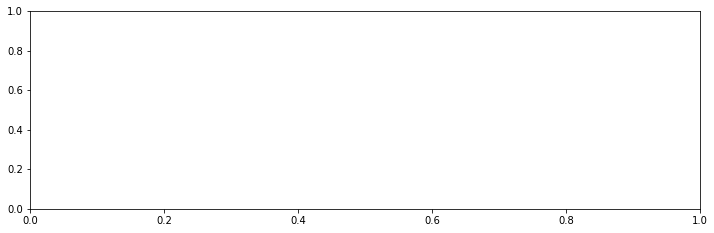

In [7]:
def load_data():
    df_read = sm.datasets.nile.load_pandas().data
    s_date = pd.Series(
        [pd.to_datetime(str(int(y_str))) for y_str in df_read['year']]
    )
    df = df_read.set_index(s_date)
    df = df.drop('year', axis=1)

    return df

df_nile = load_data()

# Plot Time Series Data
ax = df_nile['volume'].plot(figsize=(8,4), grid=True)
ax.set_xlabel('year')
ax.set_ylabel('volume x 10^8 m^3')
plt.show()

# Data Split (70: 30)
# ACF, PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train.values, lags=40, ax=ax2)

In [12]:
info_criteria = sm.tsa.stattools.arma_order_select_ic(
                    df_train.values, ic=['aic', 'bic']
                )
print(info_criteria.aic_min_order)
print(info_criteria.bic_min_order)

NameError: name 'df_train' is not defined